In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [2]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

* The 'book_table', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines' and 'approx_cost(for two people)' columns are having some null values.

In [4]:
#dropping the unnnecessary columns
df.drop(['url', 'address', 'phone','menu_item'], axis=1, inplace = True)

### Renaming few columns for our convinience

In [5]:
df.rename(columns = {"approx_cost(for two people)" : "cost_two", "listed_in(type)" : "service_type", "listed_in(city)" : "serve_to"}, inplace = True)

In [6]:
df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,reviews_list,service_type,serve_to
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari


In [7]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost_two', 'reviews_list',
       'service_type', 'serve_to'],
      dtype='object')

#  Data Cleaning

In [8]:
# Converting the cost_two variaible into integer
df.cost_two = df.cost_two.astype(str)
df.cost_two = df.cost_two.apply(lambda x : x.replace(',','')).astype(float)

In [9]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

* We need to reply the `NEW` & `-` value from the rate column into `NaN` value to convert the `object` data type to `str`. 

In [10]:
#replacing the 'NEW' & '-' values with NaN
df['rate'] = df.rate.replace('NEW', np.NaN)
df['rate'] = df.rate.replace('-', np.NaN)
df.rate = df.rate.astype(str)

In [11]:
#converting the rate variable to float value
df.rate = df.rate.apply(lambda x : x.replace('/5','')).astype(float)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,reviews_list,service_type,serve_to
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [12]:
# Replacing the NaN values for the cost_two feature with mean value

df['cost_two'] = df['cost_two'].fillna(df['cost_two'].mean())

In [13]:
# Replacing the NaN values in rate feature

df['rate'] = df['rate'].fillna(df['rate'].mean())

# Data Analyzation

### Checking the count of each cost_two category present. 

D:\Softies\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



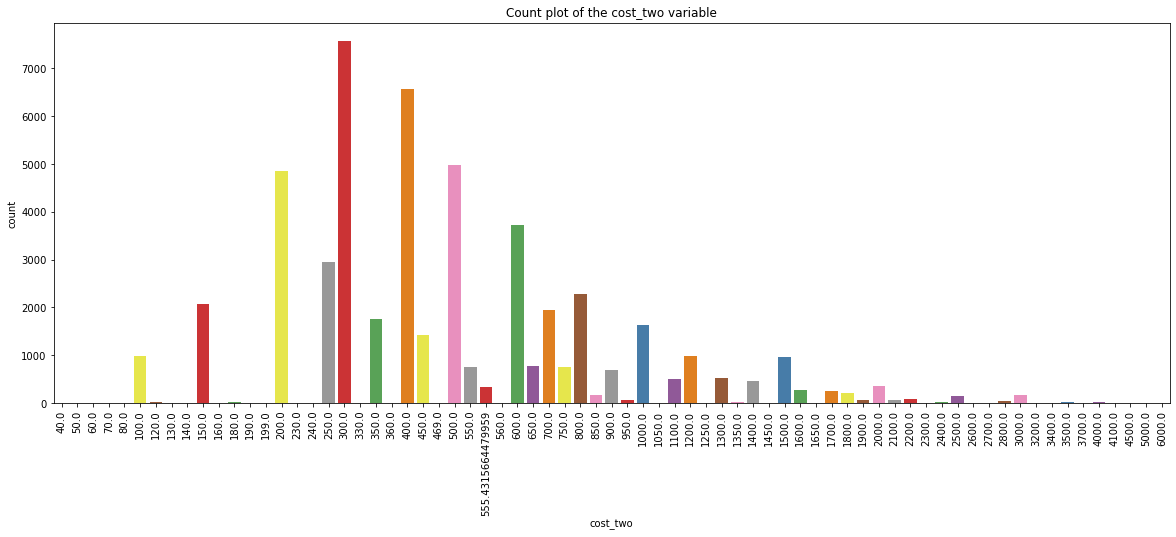

In [14]:
plt.rcParams['figure.figsize'] = 20,7
sns.countplot(df['cost_two'], palette='Set1')
plt.title("Count plot of the cost_two variable")
plt.xticks(rotation = 90)
plt.show()

* The graph shows that majority of the restaurant's avg cost for 2 plates lies between 200.0 to 700.0

### Is there any difference between votes of restaurants and avg cost(for two)?

<Figure size 3600x360 with 0 Axes>

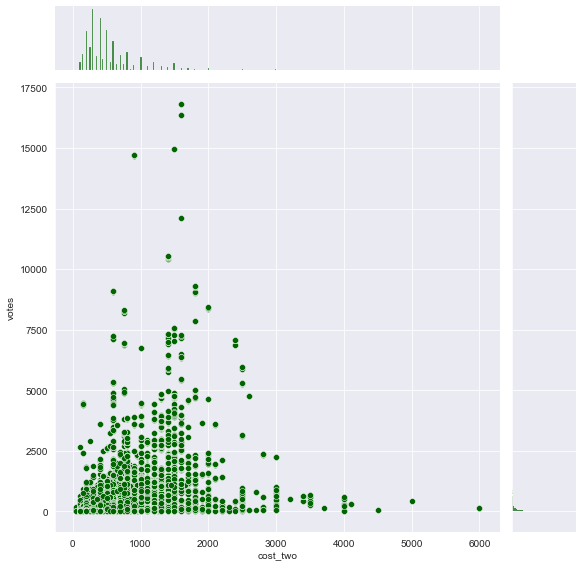

In [15]:
plt.figure(figsize=(50,5))
sns.set_style("darkgrid")
sns.jointplot(x = 'cost_two', y = 'votes', data=df, color = 'darkgreen',height = 8, ratio = 6)

* From the scatter plot we can see that the restaurants with avg cost for 2 plates below 1500.0 has more votes. The distribution plot of `votes` on the right side indicates that the majority of votes pooled lie in bucket of 1000-2500.

### How many restaurants are there in a particular location?

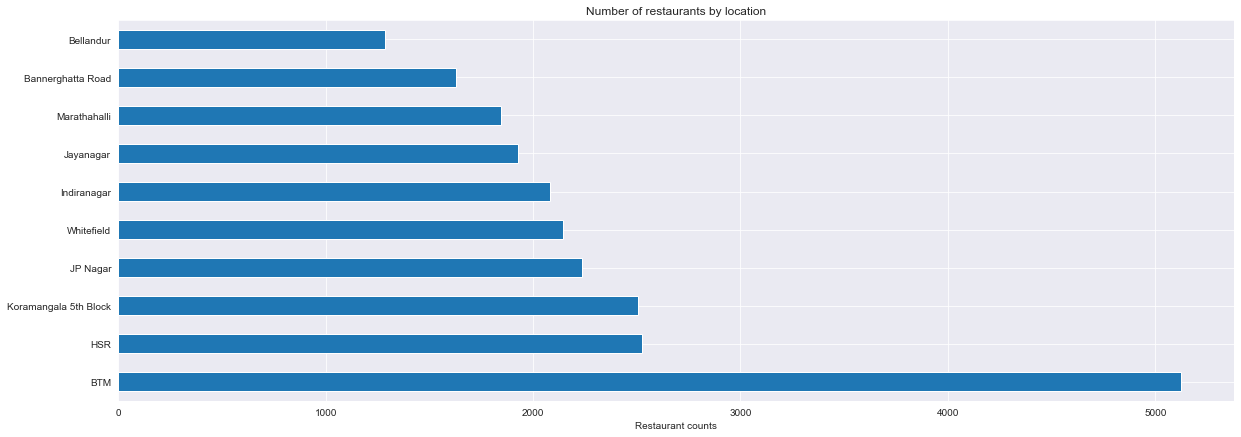

In [16]:
df.location.value_counts().nlargest(10).plot(kind='barh')
plt.title("Number of restaurants by location")
plt.xlabel("Restaurant counts")
plt.show()

* From the above visualization we can say that most number of the restaurants are located at **BTM** which makes it most popular residential and commercial and residential places in Banglore.

In [17]:
df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,reviews_list,service_type,serve_to
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari


###  How many of the restaurants do not accept online orders?

In [18]:
trace = go.Pie(labels = ['Online orders', 'No online orders'], values = df['online_order'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','pink'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of order variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

* From the above pie chart we can say that people tend to order online rather than going to a restaurant and dining in.

###  Which are the foodie areas in Bangalore?

D:\Softies\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='location'>

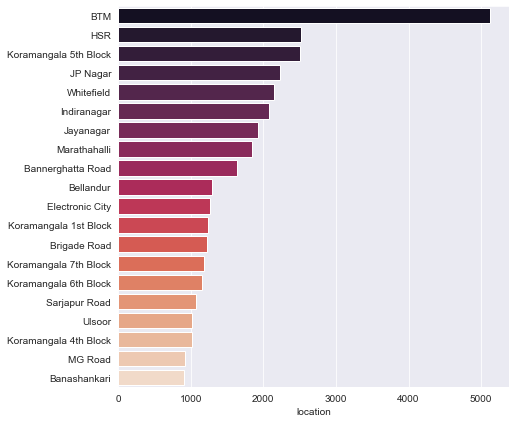

In [19]:
plt.figure(figsize=(7,7))
Rest_locations=df['location'].value_counts()[:20]
sns.barplot(Rest_locations,Rest_locations.index,palette='rocket')

* So **BTM** layout(an abbreviation of Byrasandra, Tavarekere and Madivala Layout) is the best place for foodies.

### Is there any relation between the rating of restaurants and accepting and not accepting online orders?

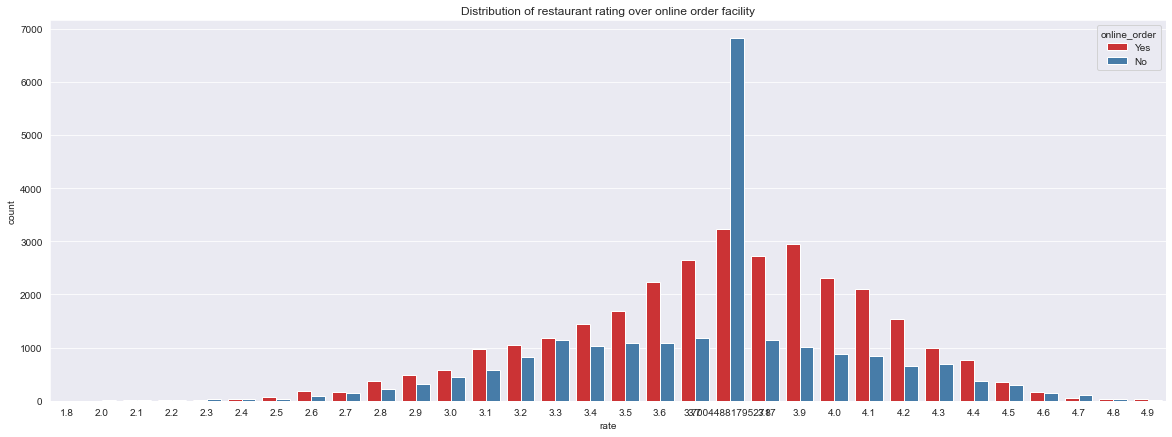

In [20]:
sns.countplot(x = df['rate'], hue = df['online_order'], palette= 'Set1')
plt.title("Distribution of restaurant rating over online order facility")
plt.show()

* We can clearly observe the restaurant which dont have online order facility are more likely to lose the rating as compared to the restuarants which have online order facility.

### Which are the most popular restaurant types in Bangalore?

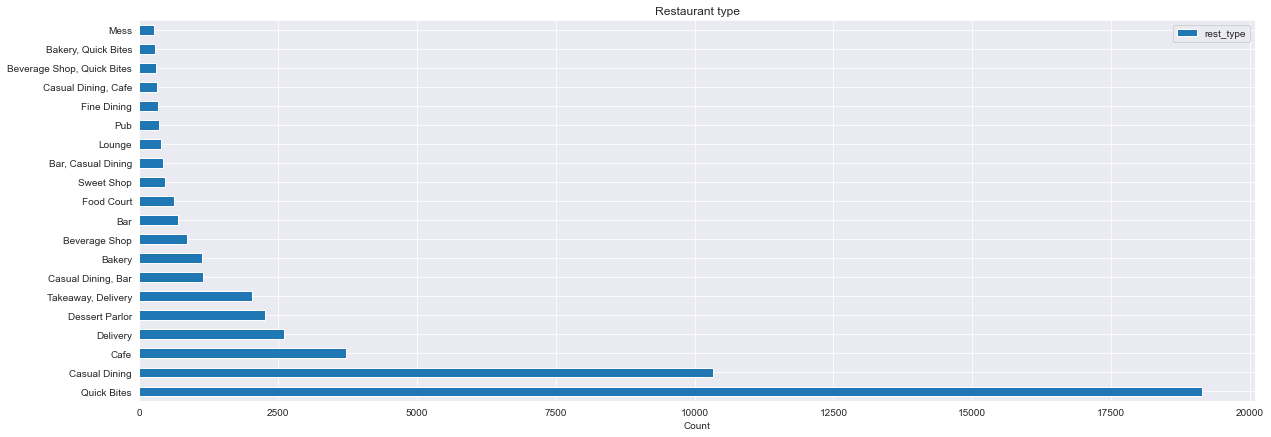

In [21]:
df.rest_type.value_counts().nlargest(20).plot(kind = 'barh')
plt.title("Restaurant type")
plt.xlabel("Count")
plt.legend()
plt.show()

* From the above visuals we see the top 20 restaurant type. We can see that the restaurant type `Quick Bites` is more popular among people as compared to the rest of the restaurant types.

### Which are the most popular dishes liked by the people of Banglore?

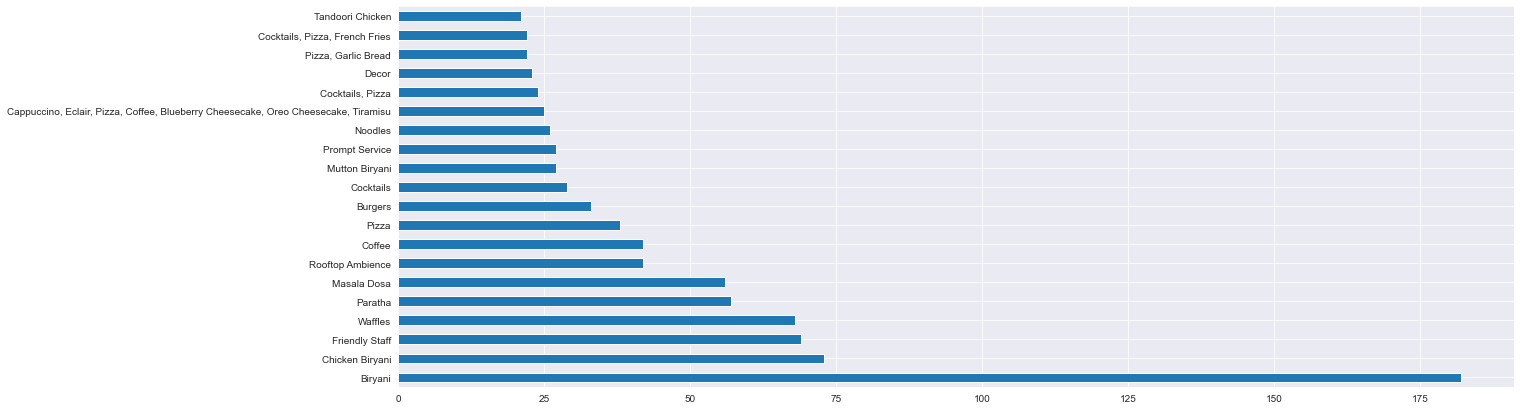

In [22]:
df.dish_liked.value_counts().nlargest(20).plot(kind = 'barh')
plt.show()

* We are able to see the top 20 dish's liked by the people. In this graph we can clearly see that the dish `Biryani` gains the top most position as compared to the rest of the dishes

###  Which are the top 20 restaurants in Bangalore?

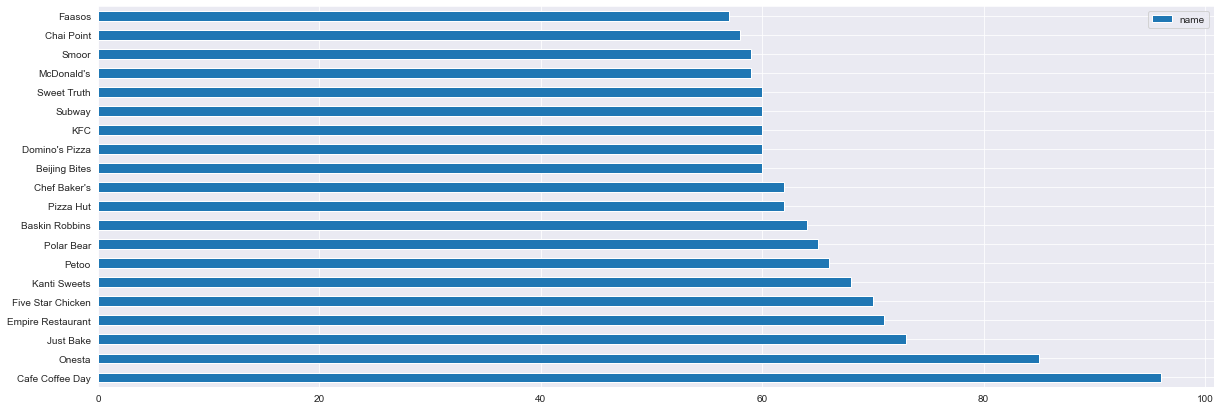

In [23]:
df.name.value_counts().nlargest(20).plot(kind = 'barh')
plt.legend()
plt.show()

* The restaurant which is more famous amongst people are `Cafe Coffee Day`.

###  How many restaurants have a table booking facility?


In [24]:
# Plotting a pie chart for online orders

trace = go.Pie(labels = ['Table booking available', 'No table booking available'], values = df['book_table'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['pink','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of order variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

* From the above Pie chart we can see that 87.5% of the restaurants have table booking facility available and 12.5% dont have table booking available.

###  How the cost_two affects if the restaurant has table booking or not?

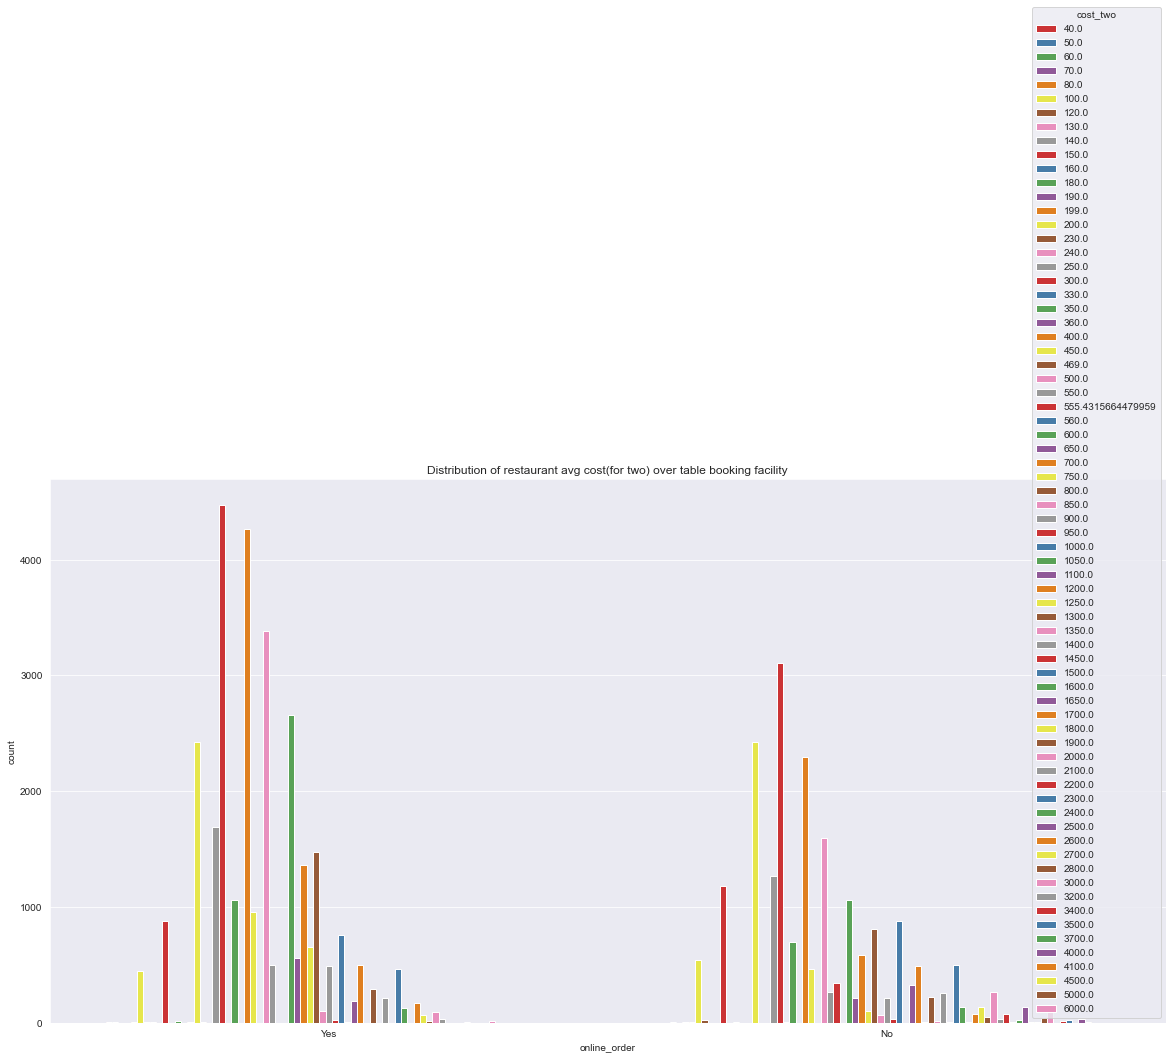

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(x = df['online_order'], hue = df['cost_two'], palette= 'Set1')
plt.title("Distribution of restaurant avg cost(for two) over table booking facility")
plt.show()

* We can clearly see that the cost_two affects drastically if the restaurant has table booking or not. The restaurants having online order facility tends to also have more sale.

### What are the biggest and best restaurant chain(top 5)? 

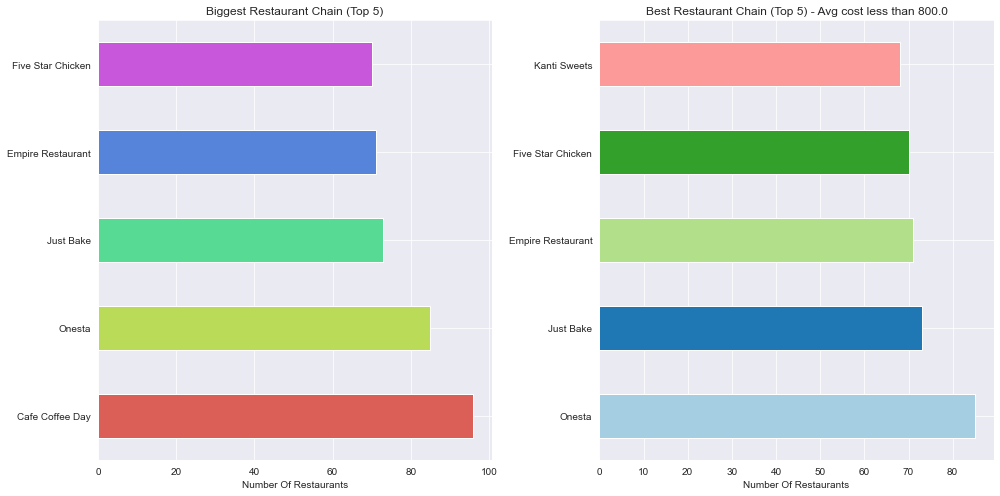

In [26]:
plt.rcParams['figure.figsize'] = 14,7
plt.subplot(1,2,1)

df.name.value_counts().head().plot(kind = 'barh', color = sns.color_palette("hls", 5))
plt.xlabel("Number Of Restaurants")
plt.title("Biggest Restaurant Chain (Top 5)")

plt.subplot(1,2,2)

df[df['cost_two'] <= 800.0]['name'].value_counts().nlargest(5).plot(kind = 'barh', color = sns.color_palette("Paired"))
plt.xlabel("Number Of Restaurants")
plt.title("Best Restaurant Chain (Top 5) - Avg cost less than 800.0")
plt.tight_layout()

* **Cafe Coffee Day** chain has over 90 cafes across the city that are listed in Zomato. On the other hand, **Onesta** restaurant offers the most affordable food(avg cost for two plates less than 800). 

# 2. Feature Engineering

### Converting the categorical columns into integer

* Performing One Hot Encoding operation on `online_order`,`book_table`,`location`,`rest_type`, `cuisines` columns.

In [27]:
df['online_order'] = pd.get_dummies(df['online_order'], drop_first=True)
df.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,reviews_list,service_type,serve_to
0,Jalsa,1,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,1,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,1,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari


In [28]:
df['book_table'] = pd.get_dummies(df['book_table'], drop_first=True)
df.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,reviews_list,service_type,serve_to
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari


In [29]:
# Performing One Hot Encoding on rest_type

get_dummies_rest_type = pd.get_dummies(df.rest_type)
get_dummies_rest_type.head(3)

,Bakery,"Bakery, Beverage Shop","Bakery, Cafe","Bakery, Dessert Parlor","Bakery, Food Court","Bakery, Kiosk","Bakery, Quick Bites","Bakery, Sweet Shop",Bar,"Bar, Cafe",...,"Quick Bites, Food Court","Quick Bites, Kiosk","Quick Bites, Meat Shop","Quick Bites, Mess","Quick Bites, Sweet Shop",Sweet Shop,"Sweet Shop, Dessert Parlor","Sweet Shop, Quick Bites",Takeaway,"Takeaway, Delivery"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Performing One Hot Encoding on location

get_dummies_location = pd.get_dummies(df.location)
get_dummies_location.head(3)

,BTM,Banashankari,Banaswadi,Bannerghatta Road,Basavanagudi,Basaveshwara Nagar,Bellandur,Bommanahalli,Brigade Road,Brookefield,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Performing One Hot Encoding on type

get_dummies_service_type = pd.get_dummies(df.service_type)
get_dummies_service_type.head(3)

,Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0


In [32]:
# Concatinating the dataframes
final_df = pd.concat([df,get_dummies_rest_type,get_dummies_service_type, get_dummies_location], axis = 1)
final_df.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,...,0,0,0,0,0,0,0,0,0,0
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
final_df = final_df.drop(["name","rest_type","location", 'cuisines', 'dish_liked', 'reviews_list'],axis = 1)
final_df.head()

,online_order,book_table,rate,votes,cost_two,service_type,serve_to,Bakery,"Bakery, Beverage Shop","Bakery, Cafe",...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,1,1,4.1,775,800.0,Buffet,Banashankari,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,4.1,787,800.0,Buffet,Banashankari,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,3.8,918,800.0,Buffet,Banashankari,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,3.7,88,300.0,Buffet,Banashankari,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3.8,166,600.0,Buffet,Banashankari,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
final_df.head(2)

,online_order,book_table,rate,votes,cost_two,service_type,serve_to,Bakery,"Bakery, Beverage Shop","Bakery, Cafe",...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,1,1,4.1,775,800.0,Buffet,Banashankari,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,4.1,787,800.0,Buffet,Banashankari,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
final_df = final_df.drop(["service_type","serve_to"],axis = 1)
final_df.head()

,online_order,book_table,rate,votes,cost_two,Bakery,"Bakery, Beverage Shop","Bakery, Cafe","Bakery, Dessert Parlor","Bakery, Food Court",...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,1,1,4.1,775,800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,4.1,787,800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,3.8,918,800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,3.7,88,300.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3.8,166,600.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

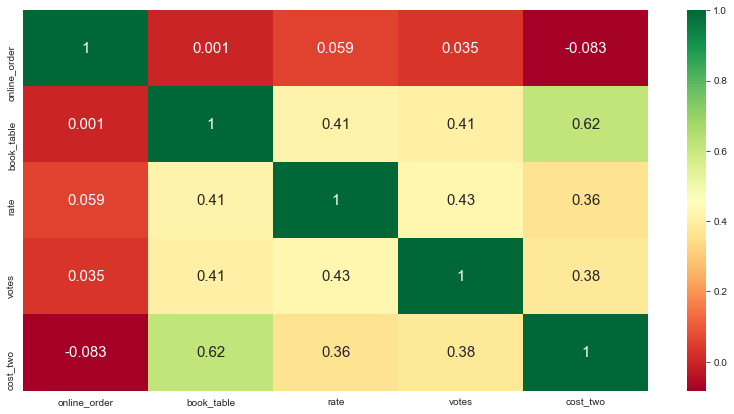

In [36]:
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

# 3. Feature Selection

In [37]:
x = final_df.drop(['cost_two'], axis = 1)
x.head()

,online_order,book_table,rate,votes,Bakery,"Bakery, Beverage Shop","Bakery, Cafe","Bakery, Dessert Parlor","Bakery, Food Court","Bakery, Kiosk",...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,1,1,4.1,775,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,4.1,787,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,3.8,918,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,3.7,88,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3.8,166,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
y = final_df['cost_two']

In [39]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [40]:
print(model.feature_importances_)

[2.32082097e-02 3.86389141e-01 3.96743459e-02 5.58743076e-02
 3.01616763e-04 4.62794059e-05 4.82839284e-04 1.24806093e-04
 4.53141255e-06 3.62810117e-05 1.33483466e-04 5.95500922e-06
 2.56227334e-02 3.13088579e-04 6.27217075e-03 1.73201972e-03
 9.30984588e-06 1.52935555e-03 2.31530489e-03 3.96732050e-05
 4.19510809e-05 2.82430771e-04 3.15515367e-07 1.58099298e-02
 9.38764862e-04 3.65635444e-06 2.15039415e-03 1.22223963e-03
 1.79405538e-05 3.85209049e-05 7.78993035e-04 3.13590936e-02
 1.15150076e-02 8.13418428e-03 4.03083091e-06 1.23716555e-04
 1.55590274e-03 2.00412723e-03 2.50246254e-06 2.84324472e-06
 2.96328972e-03 5.05511066e-04 3.49485048e-04 9.45979718e-04
 1.02942312e-03 1.45983010e-04 1.03246553e-04 5.64736522e-04
 4.05365861e-06 5.28938153e-06 2.06981595e-04 1.31784497e-05
 3.67680608e-05 9.34047608e-02 1.24844022e-02 5.20512823e-03
 1.44849889e-03 4.05750409e-04 3.41246548e-06 2.56210101e-05
 1.34072440e-05 6.95728211e-05 5.26166912e-05 2.43209756e-04
 3.00181763e-02 5.659504

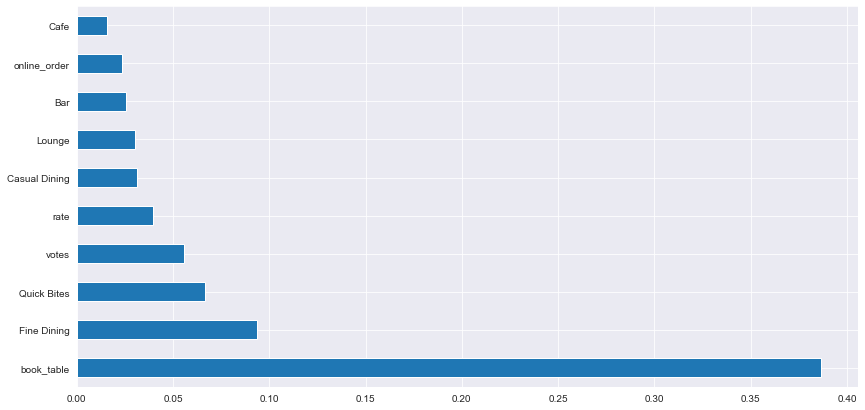

In [41]:
#plotting graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

* From the above graph we can see the top 10 most important features which are very important to train our model and get correct predictions. We will be using these features for our model building.

D:\Softies\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='cost_two', ylabel='Density'>

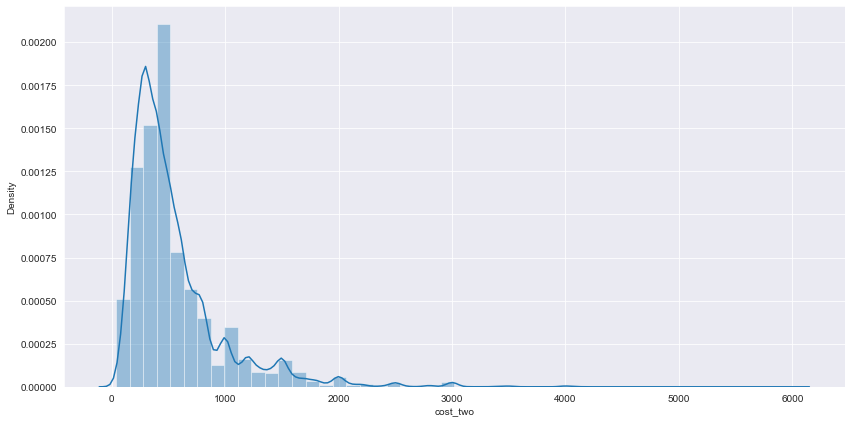

In [42]:
sns.distplot(df['cost_two'])

# 4. Model Building

In [43]:
#Spliting data into test and train

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

### Applying Linear Regression Algorithm

In [44]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train)
lr.score(x_test,y_test)

0.7692548673133435

### Applying Decision tree Regressor

In [45]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(criterion='mse')
dtree.fit(x_train, y_train)
dtree.score(x_test,y_test)

0.9534806050428243

### Applying Random Forest Regressor Algorithm

In [46]:
from sklearn.ensemble import RandomForestRegressor

RForest = RandomForestRegressor()
RForest.fit(x_train, y_train)
RForest.score(x_test, y_test)

0.9598429915235339

In [47]:
models = pd.DataFrame({
    'Model' : ['Linear Regression','Decision Tree', 'Random Forest'],
    'Score' : [lr.score(x_test, y_test), dtree.score(x_test, y_test), RForest.score(x_test, y_test)]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Random Forest,0.959843
1,Decision Tree,0.953481
0,Linear Regression,0.769255
